In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

In [3]:
# load data
combats = pd.read_csv('./Python/Data/combats.csv')
pokemons = pd.read_csv('./Python/Data/pokemon.csv')
tests = pd.read_csv('./Python/Data/tests.csv')

In [4]:
pokemons.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
pokemons.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [51]:
pokemons.loc[pokemons['#'] == 231]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False


In [7]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [8]:
# return stats of 2 pokemons
def get_fight_stats(pokid_1, pokid_2):
    # get pokemons stats by id
    pok1 = pokemons.loc[(pokid_1-1), ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
    pok2 = pokemons.loc[(pokid_2-1), ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
    # put stats in 1 row
    pok_fight_stats = pd.concat([pok1, pok2])
    
    return pok_fight_stats

In [9]:
features_compose = []

# create features / train set
for i in range(0,50000):
    # Get stats of pokemons per battle(row) in combats
    p = get_fight_stats(combats.loc[i,['First_pokemon']].values[0], combats.loc[i,['Second_pokemon']].values[0])
    # columns in format: Pokemon1 - hp, atk, def + Pokemon2 - hp, atk, def
    features_compose.append((p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9], p[10], p[11] ))

#features = pd.DataFrame(features_compose, columns=('P1_HP', 'P1_ATK', 'P1_DEF', 'P2_HP', 'P2_ATK', 'P2_DEF'))
features = pd.DataFrame(features_compose, columns=('P1_HP', 'P1_ATK', 'P1_DEF', 'P1_SP_ATK', 'P1_SP_DEF', 'P1_SPEED', 'P2_HP', 'P2_ATK', 'P2_DEF',  'P2_SP_ATK', 'P2_SP_DEF', 'P2_SPEED'))

In [10]:
features.head()

,P1_HP,P1_ATK,P1_DEF,P1_SP_ATK,P1_SP_DEF,P1_SPEED,P2_HP,P2_ATK,P2_DEF,P2_SP_ATK,P2_SP_DEF,P2_SPEED
0,50,64,50,45,50,41,70,70,40,60,40,60
1,91,90,72,90,129,108,91,129,90,72,90,108
2,55,40,85,80,105,40,75,75,75,125,95,40
3,40,40,40,70,40,20,77,120,90,60,90,48
4,70,60,125,115,70,55,20,10,230,10,230,5


In [11]:
# Defining target(winner) in binary
y_pred = pd.DataFrame(np.where(combats['First_pokemon'] == combats['Winner'], 0, 1), columns=(['Winner']))
# 0 = First(attacking) pokemon won
# 1 = Second(attacked) pokemon won


In [22]:
y_pred[0:5]

,Winner
0,1
1,1
2,1
3,1
4,0


In [12]:
# Sanitize check winner
print(y_pred['Winner'][1:10])
combats.head(10)

1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    1
Name: Winner, dtype: int64


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [13]:
# assign train / test
X = features.values
y = y_pred['Winner']

# divide data in train val & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [14]:
# show sets shapes
print("X_train: %s \ny_train: %s" % (X_train.shape,y_train.shape,))
print("\nX_test: %s \ny_test: %s" % (X_test.shape,y_test.shape,))

X_train: (40000, 12) 
y_train: (40000,)

X_test: (10000, 12) 
y_test: (10000,)


In [15]:
fulla = pd.concat([features, y_pred], axis=1)

In [65]:
# features + pred col
fulla.head()

,P1_HP,P1_ATK,P2_HP,P2_ATK,Winner
0,50,64,70,70,1
1,91,90,91,129,1
2,55,40,75,75,1
3,40,40,77,120,1
4,70,60,20,10,0


In [16]:
# load logistic regression model fit and create model 
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

/Users/satrya/miniconda3/envs/env_deep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# test model on test data
predicted_test = model.predict(X_test)

In [18]:
# check result on predicting test data
print(metrics.accuracy_score(y_test, predicted_test))

0.8919


In [19]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, predicted_test)
print(confusion)

[[4222  545]
 [ 536 4697]]


In [63]:
# save model to Models map
filename = 'Models/logistic_model_v2.sav'
joblib.dump(model, filename)

['Models/logistic_model_v2.sav']

In [67]:
# load the model from disk
loadfile = 'Models/logistic_model_v2.sav'
loaded_model = joblib.load(loadfile)
result = loaded_model.score(X_test, y_test)
print(result)

0.8919








Further data exploratory....

------------------------------------------------------------------





In [61]:
full_data = pd.concat((features, y_pred), axis = 1)

In [62]:
full_data.head()

,P1_HP,P1_ATK,P1_DEF,P1_SP_ATK,P1_SP_DEF,P1_SPEED,P2_HP,P2_ATK,P2_DEF,P2_SP_ATK,P2_SP_DEF,P2_SPEED,Winner
0,50,64,50,45,50,41,70,70,40,60,40,60,1
1,91,90,72,90,129,108,91,129,90,72,90,108,1
2,55,40,85,80,105,40,75,75,75,125,95,40,1
3,40,40,40,70,40,20,77,120,90,60,90,48,1
4,70,60,125,115,70,55,20,10,230,10,230,5,0


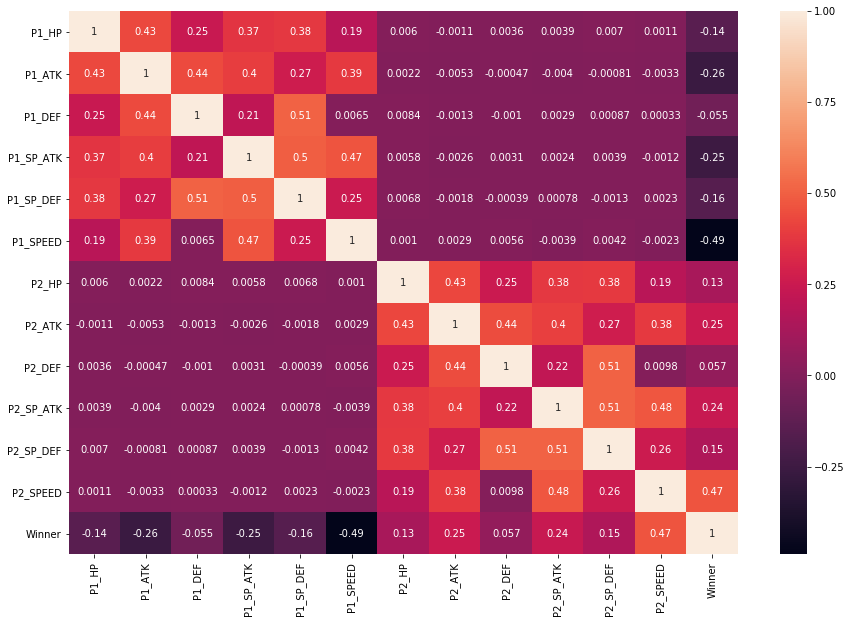

In [64]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(full_data.corr(), annot=True, ax=ax)